In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
sales_data = pd.read_csv("Sales_add.csv")

In [5]:
sales_data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
sales_data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [8]:
sales_data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


Q1:The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

Here we can do a one tailed t test

H0:The average sales after digital add is less than or equal to the average sales before digital add.
H1:The average sales after digital add is greater than the average sales before digital add.

In [9]:
t_value,p_value = stats.ttest_ind(sales_data['Sales_After_digital_add(in $)'],sales_data['Sales_before_digital_add(in $)'],alternative = 'greater')

In [13]:
print("t-statistic value : ",round(t_value,5))
print("p value : ",round(p_value,15))

t-statistic value :  12.99508
p value :  0.0


<BarContainer object of 2 artists>

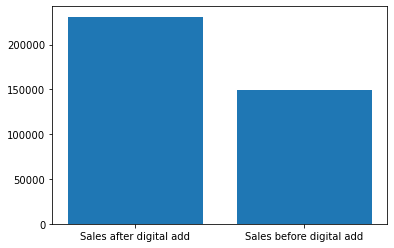

In [22]:
plt.bar(['Sales after digital add','Sales before digital add'],[sales_data['Sales_After_digital_add(in $)'].mean(),sales_data['Sales_before_digital_add(in $)'].mean()])


We can see that pvalue is less than for a significance level 0f 0.05, so we can reject the null hypothesis and conlcude that introducing digital add had increased the sales.

The company needs to check whether there is any dependency between the features “Region” and “Manager”.

Here we can do a chisquare test for independence

H0: Region and Manager are independent
H1: Region and Manager are dependent

In [ ]:
crosstab = pd.crosstab(sales_data['Region'], sales_data['Manager'])
crosstab

In [ ]:
crosstab.plot(kind = 'bar')

In [ ]:
chi2, p, dof, exp_freq =stats.chi2_contingency(crosstab)
print("Chisquare statistic value : ",round(chi2,5))
print("Chisquare p-value : ",round(p,5))

here we can see that the p values is greater than 0.05 so we forced to accept the null hypothesis and we can say that the region and Manager are independent.

